<h1 style="background: linear-gradient(to right,rgb(99, 7, 138),rgb(206, 94, 236), #fff); color: white; font-style: italic; padding: 10px 20px; border-radius: 5px; text-align: left; font-weight:700;">
        Data Science II
</h1> 

José Armando Ramírez Islas <br>
[LinkedIn](www.linkedin.com/in/armando-islas)

# Abstract
---

Nowadays, job searching represents a high-level challenge due to the competitiveness of the market, so it is important to plan the search correctly in order to take advantage of a certain level of specialization in the area of ​​greatest interest to the applicant.
To help clarify the panorama of applicants, this initial analysis presents some important conclusions when applying or even accepting a job offer.

The target audience of this project is all those applicants looking for employment during the year 2024.


***Note***: Although the data was obtained directly from a csv file, it is planned to include (for later developments) the same in a SQL database to make its storage more efficient and scale the database, which would grant the possibility of developing a public access API, which would solve the problem of acquiring this type of data.

# Problem questions

- What are the most valuable abilities for enterprises?
- What kind of role is the most offered and what is the average salary of it?

# Data cleaning

Data cleaning was no needed in this phase of the project because the dataset was already very very clean, we'll need to add some data from another db or API to it in order to apply a more complex data cleaning to it.

# EDA

## Imports

In [80]:
import pandas as pd
from ydata_profiling import ProfileReport
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

## Data acquisition

In [42]:
df = pd.read_csv("data.csv")
df.drop(columns=['Class'], inplace=True)

## Univariate Analysis

To speed up the univariate analysis of this dataset, the ydata-profiling tool is used, which provides an explicit report of the complete characteristics of the dataset. Moreover, the generated report is interactive, which facilitates future queries on the dataset.

In [92]:
profile = ProfileReport(df, title='DataScienceII.csv')
profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

## More graphs

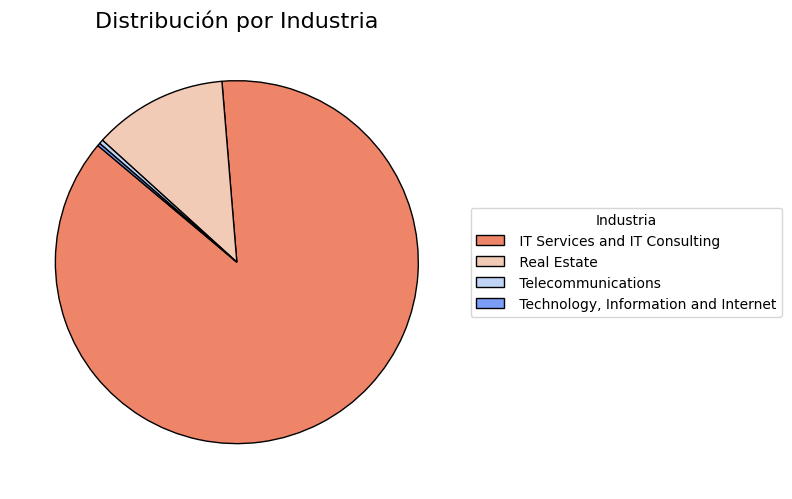

In [79]:
plt.figure(figsize=(8, 8))
colors = sns.color_palette('coolwarm_r', len(df['Industry'].value_counts()))
wedges, texts = plt.pie(
    df['Industry'].value_counts(), 
    startangle=140, 
    colors=colors, 
    wedgeprops={'edgecolor': 'black'})
plt.title('Distribución por Industria', fontsize=16)
plt.ylabel('')
plt.legend(wedges, df['Industry'].value_counts().index, title="Industria", loc="center left", bbox_to_anchor=(1, 0.5))
plt.tight_layout()
plt.show()

It seems that the largest job offering (at least in this dataset) is concentrated in the IT industry...

In [28]:
df.head()

,Company_Name,Class,Designation,Location,Total_applicants,LinkedIn_Followers,Level,Involvement,Employee_count,Industry,...,REACTJS,AI,UI,TABLEAU,NODEJS,EXCEL,POWER BI,SELENIUM,HTML,ML
0,Wipro,Class 3,Project Manager,Maharashtra,0,6737300,Full-time,Entry level,10001,IT Services and IT Consulting,...,0,1,1,0,0,1,0,0,0,1
1,Wipro,Class 3,Project Manager,Delhi,121,6737300,Full-time,Entry level,10001,IT Services and IT Consulting,...,0,1,1,0,0,1,0,0,0,1
2,Wipro,Class 3,Project Manager,Delhi,0,6737300,Full-time,Entry level,10001,IT Services and IT Consulting,...,0,1,1,0,0,1,0,0,0,1
3,Wipro,Class 3,Administrator,Telangana,0,6737300,Full-time,Mid-Senior level,10001,IT Services and IT Consulting,...,0,1,1,0,0,1,0,0,0,0
4,Wipro,Class 3,Project Manager,Maharashtra,119,6737300,Full-time,Entry level,10001,IT Services and IT Consulting,...,0,1,1,0,0,1,0,0,0,1


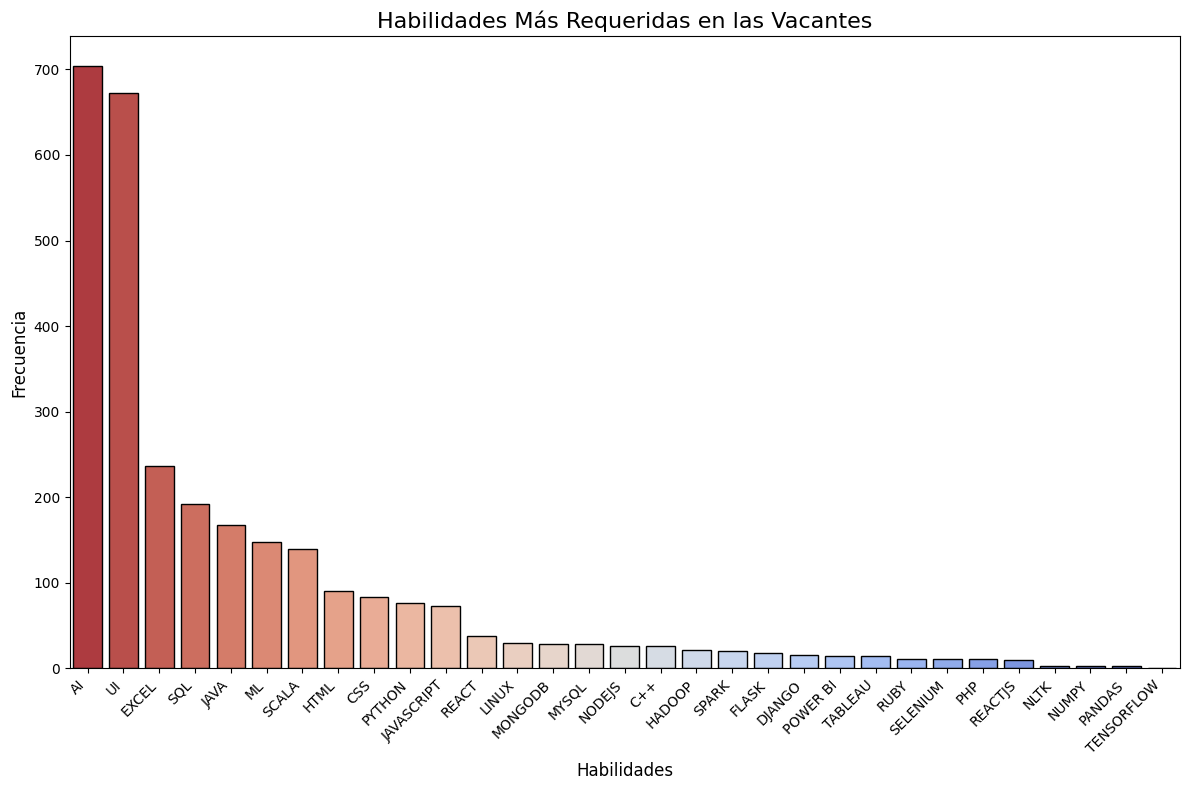

In [38]:
skills_columns = [
    'PYTHON', 'C++', 'JAVA', 'HADOOP', 'SCALA', 'FLASK', 'PANDAS', 'SPARK', 'NUMPY', 
    'PHP', 'SQL', 'MYSQL', 'CSS', 'MONGODB', 'NLTK', 'TENSORFLOW', 'LINUX', 'RUBY', 
    'JAVASCRIPT', 'DJANGO', 'REACT', 'REACTJS', 'AI', 'UI', 'TABLEAU', 'NODEJS', 
    'EXCEL', 'POWER BI', 'SELENIUM', 'HTML', 'ML'
]

skills_counts = df[skills_columns].sum().sort_values(ascending=False)

plt.figure(figsize=(12, 8))
sns.barplot(x=skills_counts.index, y=skills_counts.values, palette=sns.color_palette('coolwarm_r', len(skills_counts)), hue=skills_counts.index, edgecolor='black')
plt.title('Habilidades Más Requeridas en las Vacantes', fontsize=16)
plt.xlabel('Habilidades', fontsize=12)
plt.ylabel('Frecuencia', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

C:\Users\josea\AppData\Local\Temp\ipykernel_14448\3128364488.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=role_counts.index, y=role_counts.values, palette=sns.color_palette('coolwarm', len(role_counts)), edgecolor='black')


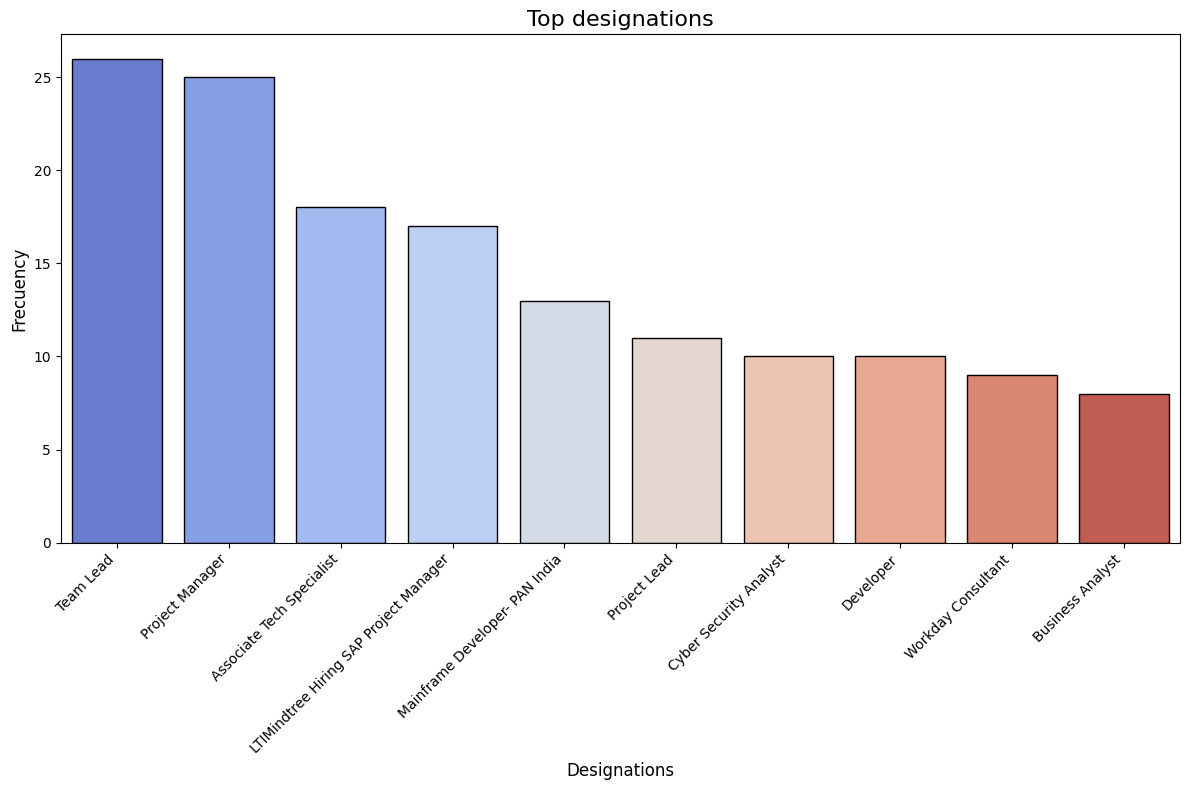

In [90]:
role_counts = df['Designation'].value_counts().head(10)
plt.figure(figsize=(12, 8))
sns.barplot(x=role_counts.index, y=role_counts.values, palette=sns.color_palette('coolwarm', len(role_counts)), edgecolor='black')
plt.title('Top designations', fontsize=16)
plt.xlabel('Designations', fontsize=12)
plt.ylabel('Frecuency', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

The most offered roles are Team Lead, Project Manager and Associate Tech Specialist.

Which seems to be very promising for aspirants...
Also, we need to have in mind that the abilities for these roles are no only hard skills but soft skills.

About the salaries for these roles, the average salary for a Team Lead is about $90k-$100k per year in USA so it is a good option